In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Stress Detection.csv")

In [22]:
df.head()

,subreddit,post_id,sentence_range,text,label,syntax_fk_grade,Stress Level
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",0,8.828316,0.292857
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,1,7.841667,0.011894
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",1,4.104027,0.141671
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1,7.910952,-0.204167


In [17]:
df.shape

(2838, 7)

In [18]:
df.isna().sum()

subreddit          0
post_id            0
sentence_range     0
text               0
label              0
syntax_fk_grade    0
Stress Level       0
dtype: int64

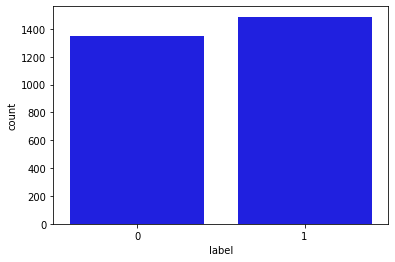

In [23]:
sns.countplot(x="label",data=df,color="blue")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


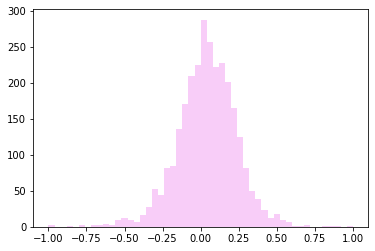

In [24]:
sns.distplot(x=df["Stress Level"],color="violet",kde=False)

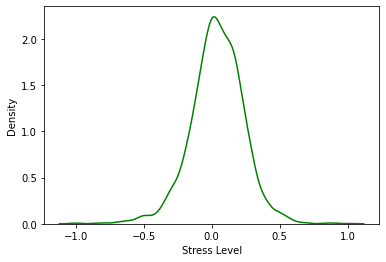

In [25]:
sns.kdeplot(df["Stress Level"],color="green")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


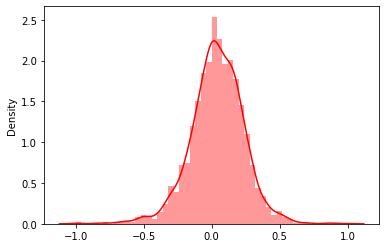

In [26]:
sns.distplot(x=df["Stress Level"],color="red")

In [6]:
df_new=df.drop(["subreddit","post_id","sentence_range","syntax_fk_grade"],axis=1)
df_new.head()

,text,label,Stress Level
0,"He said he had not felt that way before, sugge...",1,-0.002742
1,"Hey there r/assistance, Not sure if this is th...",0,0.292857
2,My mom then hit me with the newspaper and it s...,1,0.011894
3,"until i met my new boyfriend, he is amazing, h...",1,0.141671
4,October is Domestic Violence Awareness Month a...,1,-0.204167


In [7]:
df_new.columns=["Text","Sentiment","Stress Level"]

In [ ]:
import string
import nltk
import re

Removing Punctuations

In [ ]:
strpunc=string.punctuation
strpunc

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
lst1=[]
def remove_punc(txt):
  lst1="".join(i for i in txt if i not in strpunc)
  return lst1

df_new["After Punctuation Removal"]=df_new["Text"].apply(lambda x:remove_punc(x))
df_new.head()

,Text,Sentiment,Stress Level,After Punctuation Removal
0,"He said he had not felt that way before, sugge...",1,-0.002742,He said he had not felt that way before sugget...
1,"Hey there r/assistance, Not sure if this is th...",0,0.292857,Hey there rassistance Not sure if this is the ...
2,My mom then hit me with the newspaper and it s...,1,0.011894,My mom then hit me with the newspaper and it s...
3,"until i met my new boyfriend, he is amazing, h...",1,0.141671,until i met my new boyfriend he is amazing he ...
4,October is Domestic Violence Awareness Month a...,1,-0.204167,October is Domestic Violence Awareness Month a...


Tokenization

In [ ]:
lst2=[]
def tokenize(txt):
  lst2=re.split('/W+',txt)
  return lst2

#x is lowered so that we do not need to deal with uppercase alphabets
df_new["After Tokenization"]=df_new["After Punctuation Removal"].apply(lambda x:tokenize(x.lower()))
df_new.head()

,Text,Sentiment,Stress Level,After Punctuation Removal,After Tokenization
0,"He said he had not felt that way before, sugge...",1,-0.002742,He said he had not felt that way before sugget...,[he said he had not felt that way before sugge...
1,"Hey there r/assistance, Not sure if this is th...",0,0.292857,Hey there rassistance Not sure if this is the ...,[hey there rassistance not sure if this is the...
2,My mom then hit me with the newspaper and it s...,1,0.011894,My mom then hit me with the newspaper and it s...,[my mom then hit me with the newspaper and it ...
3,"until i met my new boyfriend, he is amazing, h...",1,0.141671,until i met my new boyfriend he is amazing he ...,[until i met my new boyfriend he is amazing he...
4,October is Domestic Violence Awareness Month a...,1,-0.204167,October is Domestic Violence Awareness Month a...,[october is domestic violence awareness month ...


Removing Stop Words

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
sw=nltk.corpus.stopwords.words("english")
sw[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [ ]:
lst3=[]
def removesw(txt):
  lst3=[i for i in txt if i not in sw]
  return lst3

df_new["After Stop Words Removal"]=df_new["After Tokenization"].apply(lambda x:removesw(x))
df_new.head()

,Text,Sentiment,Stress Level,After Punctuation Removal,After Tokenization,After Stop Words Removal
0,"He said he had not felt that way before, sugge...",1,-0.002742,He said he had not felt that way before sugget...,[he said he had not felt that way before sugge...,[he said he had not felt that way before sugge...
1,"Hey there r/assistance, Not sure if this is th...",0,0.292857,Hey there rassistance Not sure if this is the ...,[hey there rassistance not sure if this is the...,[hey there rassistance not sure if this is the...
2,My mom then hit me with the newspaper and it s...,1,0.011894,My mom then hit me with the newspaper and it s...,[my mom then hit me with the newspaper and it ...,[my mom then hit me with the newspaper and it ...
3,"until i met my new boyfriend, he is amazing, h...",1,0.141671,until i met my new boyfriend he is amazing he ...,[until i met my new boyfriend he is amazing he...,[until i met my new boyfriend he is amazing he...
4,October is Domestic Violence Awareness Month a...,1,-0.204167,October is Domestic Violence Awareness Month a...,[october is domestic violence awareness month ...,[october is domestic violence awareness month ...


Lemmatization

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
lem=nltk.WordNetLemmatizer()

In [ ]:
lst4=[]
def lemmatize(txt):
  lst4=[lem.lemmatize(i) for i in txt]
  return lst4

df_new["After Lemmatization"]=df_new["After Stop Words Removal"].apply(lambda x:lemmatize(x))
df_new.head()

,Text,Sentiment,Stress Level,After Punctuation Removal,After Tokenization,After Stop Words Removal,After Lemmatization
0,"He said he had not felt that way before, sugge...",1,-0.002742,He said he had not felt that way before sugget...,[he said he had not felt that way before sugge...,[he said he had not felt that way before sugge...,[he said he had not felt that way before sugge...
1,"Hey there r/assistance, Not sure if this is th...",0,0.292857,Hey there rassistance Not sure if this is the ...,[hey there rassistance not sure if this is the...,[hey there rassistance not sure if this is the...,[hey there rassistance not sure if this is the...
2,My mom then hit me with the newspaper and it s...,1,0.011894,My mom then hit me with the newspaper and it s...,[my mom then hit me with the newspaper and it ...,[my mom then hit me with the newspaper and it ...,[my mom then hit me with the newspaper and it ...
3,"until i met my new boyfriend, he is amazing, h...",1,0.141671,until i met my new boyfriend he is amazing he ...,[until i met my new boyfriend he is amazing he...,[until i met my new boyfriend he is amazing he...,[until i met my new boyfriend he is amazing he...
4,October is Domestic Violence Awareness Month a...,1,-0.204167,October is Domestic Violence Awareness Month a...,[october is domestic violence awareness month ...,[october is domestic violence awareness month ...,[october is domestic violence awareness month ...


In [ ]:
df_new["Clean Text"]=df_new["After Lemmatization"]
df_new.head()

,Text,Sentiment,Stress Level,After Punctuation Removal,After Tokenization,After Stop Words Removal,After Lemmatization,Clean Text
0,"He said he had not felt that way before, sugge...",1,-0.002742,He said he had not felt that way before sugget...,[he said he had not felt that way before sugge...,[he said he had not felt that way before sugge...,[he said he had not felt that way before sugge...,[he said he had not felt that way before sugge...
1,"Hey there r/assistance, Not sure if this is th...",0,0.292857,Hey there rassistance Not sure if this is the ...,[hey there rassistance not sure if this is the...,[hey there rassistance not sure if this is the...,[hey there rassistance not sure if this is the...,[hey there rassistance not sure if this is the...
2,My mom then hit me with the newspaper and it s...,1,0.011894,My mom then hit me with the newspaper and it s...,[my mom then hit me with the newspaper and it ...,[my mom then hit me with the newspaper and it ...,[my mom then hit me with the newspaper and it ...,[my mom then hit me with the newspaper and it ...
3,"until i met my new boyfriend, he is amazing, h...",1,0.141671,until i met my new boyfriend he is amazing he ...,[until i met my new boyfriend he is amazing he...,[until i met my new boyfriend he is amazing he...,[until i met my new boyfriend he is amazing he...,[until i met my new boyfriend he is amazing he...
4,October is Domestic Violence Awareness Month a...,1,-0.204167,October is Domestic Violence Awareness Month a...,[october is domestic violence awareness month ...,[october is domestic violence awareness month ...,[october is domestic violence awareness month ...,[october is domestic violence awareness month ...


Creating Bag Of Words Using TF-IDF Vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(stop_words=sw,max_features=20)
x=tfidf.fit_transform(df_new["Text"])

In [ ]:
x

<2838x20 sparse matrix of type '<class 'numpy.float64'>'
	with 9627 stored elements in Compressed Sparse Row format>

In [ ]:
x_new=x.toarray()
x_new

array([[0.        , 0.        , 0.51567829, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.36168775,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.26588058,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
y=df_new["Stress Level"].to_numpy()
y

array([-0.0027417 ,  0.29285714,  0.01189394, ...,  0.04545454,
        0.15972222,  0.01666667])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.metrics import accuracy_score

Applying Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model_dt=DecisionTreeRegressor()
model_dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [ ]:
y_preds_dt=model_dt.predict(x_test)

In [ ]:
acc_dt=model_dt.score(x_test,y_test)
abs(acc_dt)

0.7353846424608244

Applying K Nearest Neighbors Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
model_knn=KNeighborsRegressor()
model_knn.fit(x_train,y_train)

KNeighborsRegressor()

In [ ]:
y_preds_knn=model_knn.predict(x_test)

In [ ]:
acc_knn=model_knn.score(x_test,y_test)
abs(acc_knn)

0.3299605246316646

Applying Support Vector Machine Regressor

In [ ]:
from sklearn.svm import SVR
model_svm=SVR()
model_svm.fit(x_train,y_train)

SVR()

In [ ]:
y_preds_svm=model_svm.predict(x_test)

In [ ]:
acc_svm=model_svm.score(x_test,y_test)
abs(acc_svm)

0.1849674840291513